In [131]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
tracts_nyc_gdf = gpd.read_file('./data/tracts_with_features_nyc.geojson', driver='GeoJSON')
tracts_upstate_gdf = gpd.read_file('./data/tracts_with_features_upstate.geojson', driver='GeoJSON')

# Convert to DataFrame and drop the geometry column
tracts_nyc_df = pd.DataFrame(tracts_nyc_gdf.drop(columns=['geometry']))
tracts_nyc_df.drop(columns=['GEOID'], inplace=True)
tracts_upstate_df = pd.DataFrame(tracts_upstate_gdf.drop(columns=['geometry']))
tracts_upstate_df.drop(columns=['GEOID'], inplace=True)

# Sort columns for each clustering analysis
columns_vulnerability = [ 
        'unserved medicaid enrollees / km2',
        'binge drinking', 'sleeping less than 7 hours',
        'cholesterol screening', 'current lack of health insurance',
        'taking medicine for high blood pressure', 'visits to dentist or dental clinic',
        'visits to doctor for routine checkup', 'physical health not good for >=14 days',
        'under 18years', '18 to 64years', '65year and over', 
        'white', 'black or african american', 'asian', 'hispanic or latino'
       ]

columns_profitability = [
    'insured population / km2', 'unserved commercial enrollees / km2',
    'median household income',  
    'median monthly housing cost', 'average land price / ft2'
]

columns_built_environment = [
    'agricultural land percent', 'residential district percent',
    'vacant land percent', 'commercial district percent',
    'industrial district percent', 'drove alone percent',
    'carpooled percent', 'public transit percent', 'walked percent',
    'worked from home percent',
]

cluster_vulnerability_nyc_df = tracts_nyc_df[columns_vulnerability]
cluster_profitability_nyc_df = tracts_nyc_df[columns_profitability]
cluster_built_environment_nyc_df = tracts_nyc_df[columns_built_environment]

cluster_vulnerability_upstate_df = tracts_upstate_df[columns_vulnerability]
cluster_profitability_upstate_df = tracts_upstate_df[columns_profitability]
cluster_built_environment_upstate_df = tracts_upstate_df[columns_built_environment]

# Join DataFrames on the index
cluster_vulnerability_df = pd.concat([cluster_vulnerability_nyc_df, cluster_vulnerability_upstate_df], axis=0)
cluster_profitability_df = pd.concat([cluster_profitability_nyc_df, cluster_profitability_upstate_df], axis=0)
cluster_built_environment_df = pd.concat([cluster_built_environment_nyc_df, cluster_built_environment_upstate_df], axis=0)

In [133]:
# Calculate the correlation matrix
vulnerability_corr = cluster_vulnerability_df.corr()
profitability_corr = cluster_profitability_df.corr()
built_environment_corr = cluster_built_environment_df.corr()

### Correlation Heatmap

C:\Users\kl3539\AppData\Local\miniconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


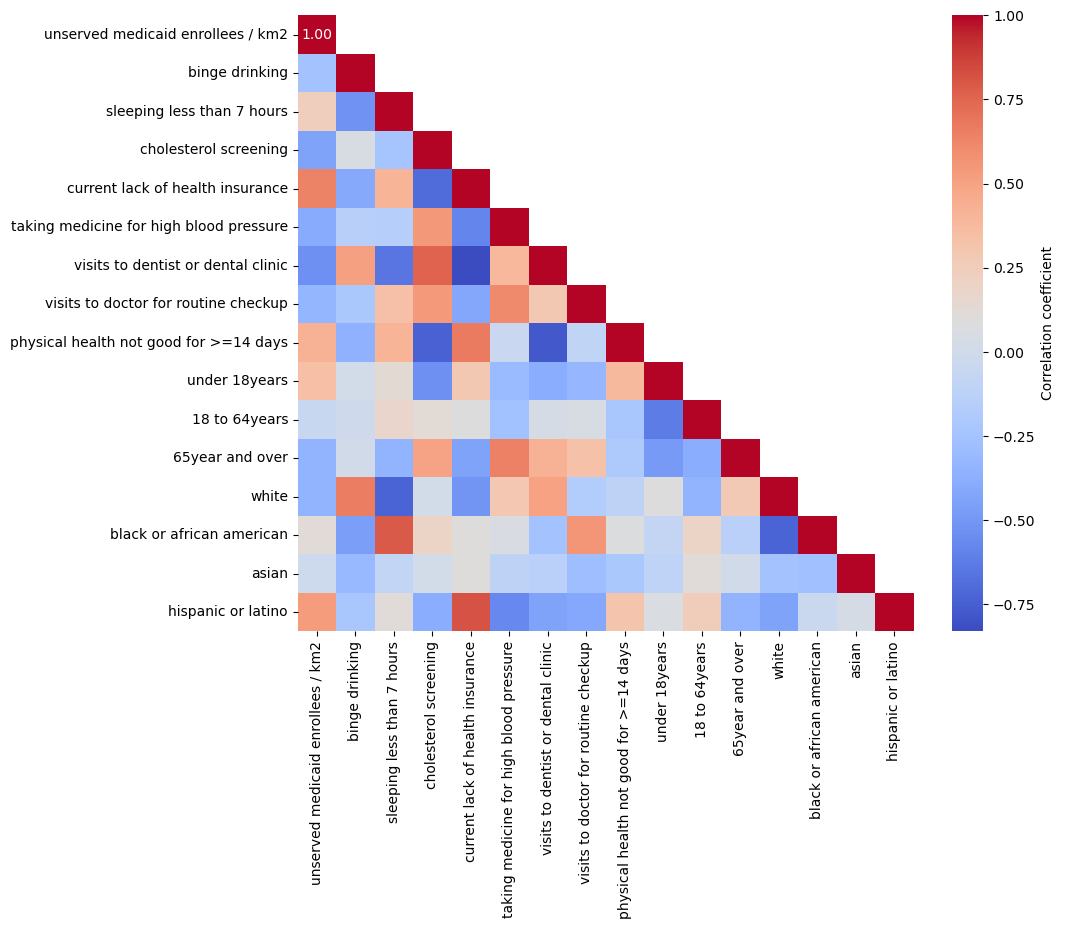

C:\Users\kl3539\AppData\Local\miniconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


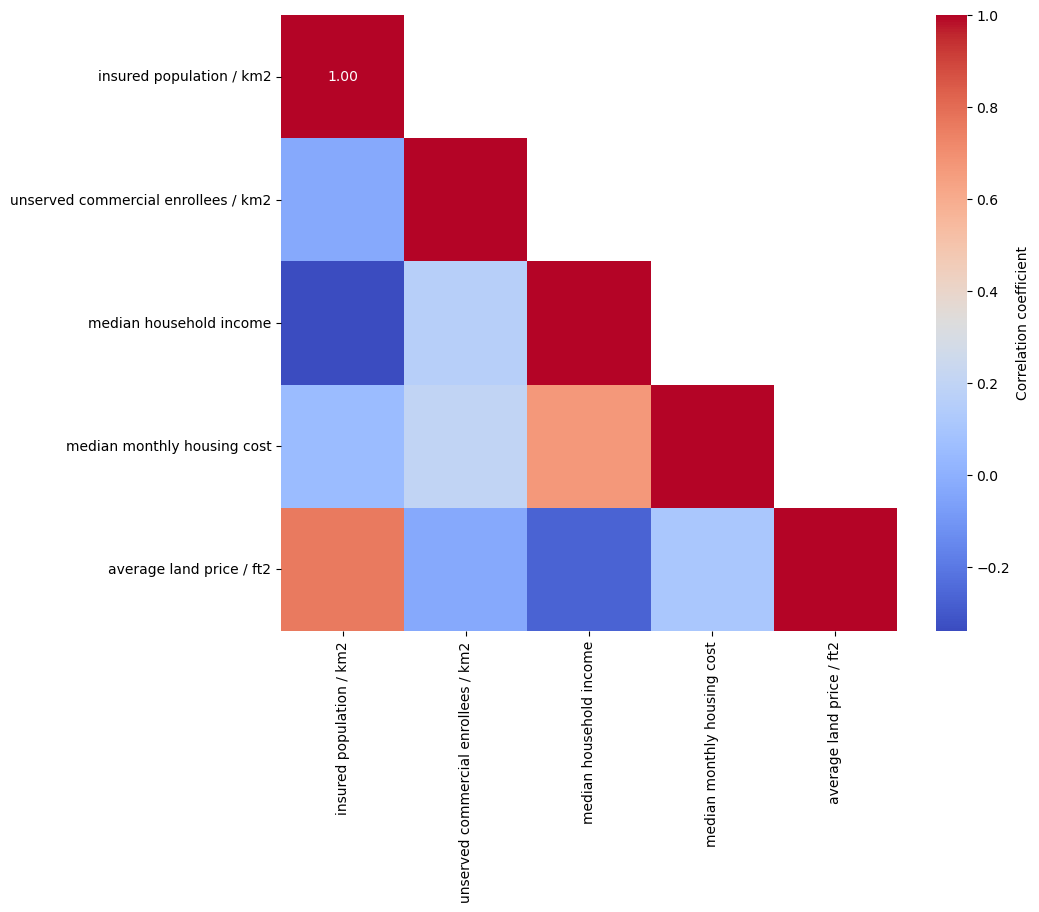

C:\Users\kl3539\AppData\Local\miniconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


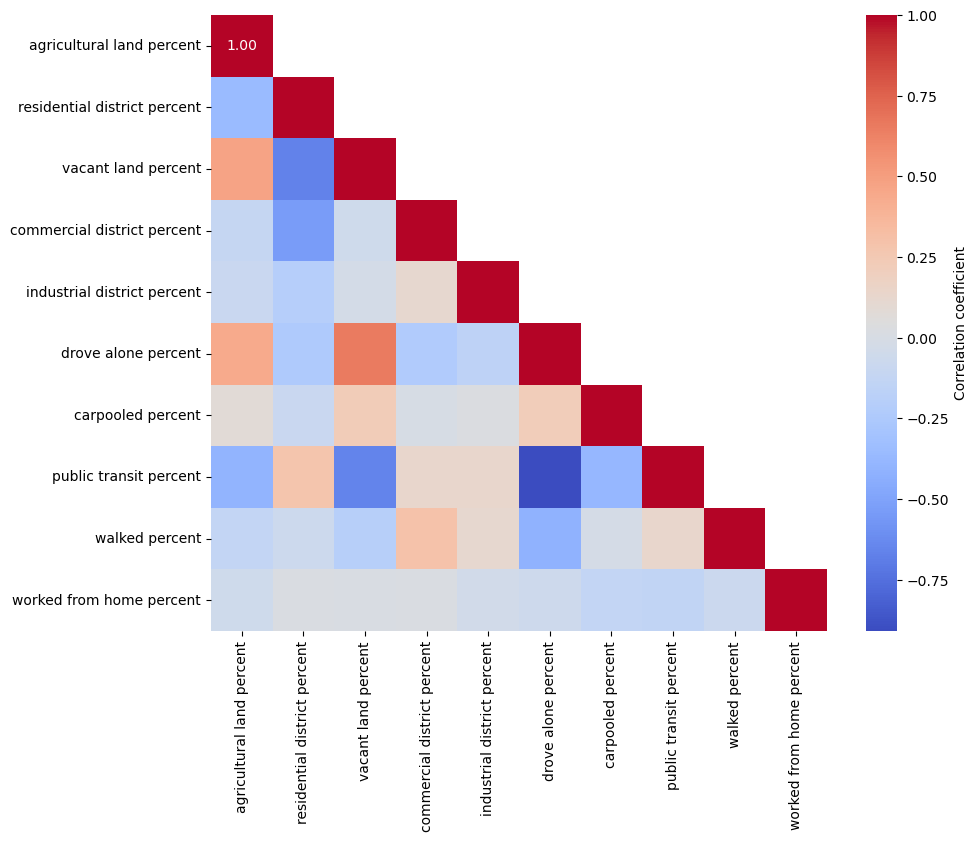

In [134]:
def save_correlation_heatmap(corr, file_name):
    mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
    
    # Set up the matplotlib figure
    plt.figure(figsize=(10, 8))
    
    # Draw the heatmap with the mask applied
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
                xticklabels=corr.columns, yticklabels=corr.columns,
                cbar_kws={'label': 'Correlation coefficient'},
                square=True)
    
    # Save the heatmap to a file
    plt.savefig(f'./${file_name}.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()  # This ensures the plot buffer is cleared correctly


# Create a mask to hide the upper triangle, including the diagonal
save_correlation_heatmap(vulnerability_corr, 'vulnerability_corr')
save_correlation_heatmap(profitability_corr, 'profitability_corr')
save_correlation_heatmap(built_environment_corr, 'built_environment_corr')

In [135]:
def findCorrelatedFeature(corr):
    # Find pairs of highly correlated features without repetition
    threshold = 0.8
    high_corr = [(i, j) for i in corr.columns for j in corr.columns if (i < j) and (corr[i][j]) > threshold]
    
    # Print out highly correlated pairs and their correlation values
    for (i, j) in high_corr:
        print(f"{i} and {j} have a correlation of {corr[i][j]:.2f}")